# Projeto 2 - NLP

-----

Nome:  Johnny Hideki Horita <br>
Turma: 780

Os segundo projeto do módulo de Machine Learning será focado no processamento de linguagem natural! Usaremos os algoritmos aprendidos e as técnicas vistas na segunda parte do curso para extrairmos informações relevantes de texto. Mais precisamente, de publicações no Twitter.

## Os Dados

Utilizaremos um Dataset obtido do Twitter com 100K postagens entre os dias 01/08/2018 e 20/10/2018. Cada postagem é classificada como **positiva**, **negativa** ou **neutra**.  

Dois arquivos serão disponilizados para o desenvolvimento dos modelos, um para treino/validação e outro para submissão. Os arquivos se encontram na pasta */Dados/train* e */Dados/subm*, respectivamente.

Descrição das colunas:

- **id**: ID único para o tweet  
- **tweet_text**: Texto da publicação no Twitter  
- **tweet_date**: Data da publicação no Twitter  
- **sentiment**: 0, se negativo; 1, se positivo; 2, se neutro  
- **query_used**: Filtro utilizado para buscar a publicação

## O Problema

Você deverá desenvolver um modelo para detectar o sentimento de uma publicação do Twitter a classificando em uma das três categorias: **positiva**, **negativa** ou **neutra**. O texto da publicação está disponível na coluna "tweet_text". Teste pelo menos 3 técnicas de NLP diferentes e escolha a métrica de avaliação que julgar mais pertinente.  

Escolha o melhor modelo e gere uma base a partir dos dados de submissão, que estão no caminho ```Dados/subm/Subm3Classes.csv```, com o seguinte formato:


|id|sentiment_predict
|-|-|
|12123232|0
|323212|1
|342235|2

Salve essa tabela como um arquivo csv com o nome ```<nome>_<sobrenome>_nlp_degree.csv``` e submeta-o como parte da entrega final do projeto.  

Para ajudar no desenvolvimento, é possível dividir o projeto em algumas fases:

- **Análise de consistência dos dados**: analise se os dados estão fazendo sentido, se os campos estão completos e se há dados duplicados ou faltantes. Se julgar necessário, trate-os.    


- **Análise exploratória**: analise a sua base como um todo, verifique o balanceamento entre as classes e foque, principalmente, na coluna ```tweet_text```.    


- **Pré-processamento e transformações**: projetos de NLP exigem um considerável pré-processamento. Foque no tratamento da string do texto. Procure começar com tratamentos simples e adicione complexidade gradualmente. Nessa etapa você testará diferentes técnicas de transformações, como o Bag Of Words e o TF-IDF.    


- **Treinamento do modelo**: depois das transformações, você poderá executar o treinamento do modelo classificador. Nessa etapa o problema se torna semelhante aos abordados na primeira parte do módulo. Você pode testar diversos classificadores como RandomForest, AdaBoost, entre outros. Otimize os hiperparâmetros do modelo com técnicas como a GridSearch e a RandomizedSearch.    


- **Conclusões**: descreva, em texto, as conclusões sobre os seus estudos. O modelo é capaz de identificar o sentimento das publicações? É possível extrapolar o modelo para outros contextos, como a análise de sentimento de uma frase qualquer? Pense em questões pertinentes e relevantes que você tenha obtido durante o desenvolvimento do projeto!     



## Critérios de avaliação

Os seguintes itens serão avaliados:

1. Desenvolvimento das etapas descritas acima;


2. Reprodutibilidade do código: seu código será executado e precisa gerar os mesmos resultados apresentados por você;


3. Clareza: seu código precisa ser claro e deve existir uma linha de raciocínio direta. Comente o código em pontos que julgar necessário para o entendimento total;


4. Justificativa das conclusões obitdas: não existirá certo ou errado, mas as decisões e as conclusões precisam ser bem justificadas com base nos resultados obtidos.  

O desempenho do modelo **não** será considerado como critério de avaliação.  

## Informações gerais

- O projeto deve ser desenvolvido individualmente;


- Data de divulgação: 11/01/2022;


- Aula de monitoria: 19/01/2022;


- Data de entrega: 26/01/2022;


- Entrega através do Class: Árvore de Decisão -> Exercícios -> Projeto 2


Anexar, na entrega, o notebook de desenvolvimento e o arquivo .csv de submissão, da seguinte forma:  

notebook: ```<nome>_<sobrenome>_<númeroTurma>_projeto_2.ipynb```   
csv: ```<nome>_<sobrenome>_<númeroTurma>_projeto_2_submissao.csv```


## Dicas

### Base de treino e submissão

A base de submissão não possui a variável de saída, portanto ela será utilizada **apenas** para gerar o arquivo que acompanha a submissão do projeto.      

### Tente encontrar possíveis vieses

É muito comum que modelos de NLP possuam fortes vieses, como a tendência de relacionar palavras específicas com alguma classe de saída. Tente encontrar vieses no seu estudo, isso pode ajudar a tirar boas conclusões. o campo "query_used" pode ser útil para essa análise.  

### O pré-processamento é a chave para um bom desempenho

Essa é a etapa que mais vai contribuir para o desempenho do seu modelo. Seja criativo e desenvolva essa etapa de uma maneira que seja fácil de aplicar o mesmo processamento para uma nova base, você terá que fazer isso para gerar a base de submissão.

### Um termômetro para o seu desenvolvimento

Após a correção do seu projeto, o professor irá disponibilizar a sua acurácia obtida na base de submissão. Você pode interpretar esse resultado como a simulação do resultado do seu modelo em produção. Uma diferença entre o resultado do estudo e o resultado de submissão indica um grau de **overfitting** no seu modelo.

-------

# Desenvolvimento do projeto

## 1. Análise de consistência dos dados

### Importando bibliotecas

In [1]:
%%time

# Bibliotecas
import os
import re
import string
import random
import time

import pandas as pd
import numpy as np
import datetime
import requests
import warnings
from collections import Counter
from pprint import pprint

from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import squarify
import plotly.offline as py
import plotly_express as px
from plotly import graph_objs as go
import plotly.figure_factory as ff

from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from mlxtend.plotting import plot_confusion_matrix

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, StratifiedKFold, cross_validate

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec, doc2vec

# Logistic Regression
from sklearn.linear_model import LogisticRegression 
# Support Vector Machine
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
# Naive Bayes (Gaussian, Multinomial,BernoulliNB)
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
# Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier
# KNN (k-nearest neighbor)
from sklearn.neighbors import KNeighborsClassifier
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
# XGBoost Classifier
from xgboost import XGBClassifier
# LGBM Classifier
from lightgbm import LGBMClassifier
# Ada Boosting Classifier
from sklearn.ensemble import AdaBoostClassifier
# Dummy Boosting Classifier
from sklearn.dummy import DummyClassifier
# GridSearchCV
from sklearn.model_selection import GridSearchCV

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from unidecode import unidecode

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#!pip install enelvo
from enelvo.normaliser import Normaliser

# Abaixo seguem 2 formas para a instalação do spaCy: via conda ou pip
# Instalação utilizando conda
#!conda install -c conda-forge spacy

# Instalação utilizando Pip
#!pip install -U pip setuptools wheel
#!pip install -U spacy

import spacy
from spacy.util import compounding
from spacy.util import minibatch

from tqdm import tqdm

import shap

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from IPython.core.display import HTML as Center
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

print('Bibliotecas carregadas com sucesso.')

Bibliotecas carregadas com sucesso.
Wall time: 8.18 s


### Padrões

In [2]:
# Definição de padrões para gráficos e cores

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

colors = sns.color_palette("pastel") # deep, pastel, Set1 Set2 Set3, icefire, tab10, muted, colorlind, coolwarm
cmap_colors = 'GnBu'

font_path = "./fonts/CabinSketch-Bold.ttf"

In [3]:
# Definição de padrões para centralização de gráficos no notebook

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

### Funções

In [4]:
# Função de avaliação dos valores de NaN no dataframe

def missing_values_table(df):
    '''
    Função para verificar se existem valores nulos no dataframe
    Entrada:
        df - dataframe;
        
    Resultado: 
        Apresentação dos valores nulos no dataframe.

    '''
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = {0 : 'Valores faltantes', 1 : '% de Valores Totais'})
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[
        mz_table.iloc[:,1] != 0].sort_values(
    '% de Valores Totais', ascending=False).round(1)
    print ("O dataframe tem " + str(df.shape[1]) + " colunas e " + str(df.shape[0]) + " linhas.\n"      
        "Existem " + str(mz_table.shape[0]) +
          " colunas que têm valores faltantes.")
    mz_table.to_excel('missing_and_zero_values.xlsx', freeze_panes=(1,0), index = True)
    return mz_table


In [5]:
# Função de avaliação de modelos apresentação da matriz de confusão
score = []

def test_models(model_list, col_model_name, col_model, tec_model, X_train, X_test, y_train, y_test):
    '''
    Função para avaliação de modelos de predição
    Entrada:
        model_list - lista de modelos;
        col_model_name - label da lista de modelos, contendo o nome do modelo;
        col_model - label da lista de modelos, contendo a instancia do modelo de predição;
        tec_model - definição de tratamento de modelos;
        X_train - classe de treino
        X_test - classe de teste
        y_train - classe de treino
        y_test - classe de teste
        
    Resultado: 
        Apresentação de métricas de predição de modelos.

    '''
    for mdl in model_list:
        start = time.time()

        model = mdl[col_model]
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        
        print("")        
        print("=" * 55)
        print("Model      : %s" % mdl[col_model_name])
        print("Accuracy   : %0.4f " % accuracy_score(y_test, y_predict))
        print("Precision  : %0.4f " % precision_score(y_test, y_predict, average='weighted'))
        print("Recall     : %0.4f " % recall_score(y_test, y_predict, average='weighted'))
        print("F1 - Score : %0.4f " % f1_score(y_test, y_predict, average='weighted'))
        print("MAE        : %0.4f " % mean_absolute_error(y_test, y_predict))
        print("RMSE       : %0.4f " % np.sqrt(mean_squared_error(y_test, y_predict)))
        print("R2         : %0.4f " % r2_score(y_test, y_predict))
        print("")
        print(classification_report(y_test, y_predict))

        cm = confusion_matrix(y_test, y_predict)
        labels = ['Negativo','Positivo','Neutro']
        dsp = ConfusionMatrixDisplay(cm, display_labels=labels)
        dsp.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')
        plt.grid(False)
        plt.show()        
        
        end = time.time()
        elptime = end - start
        converted_time = str(datetime.timedelta(seconds=elptime))
        print(f'Partial time: {converted_time}')
        
        global score
        score.append([mdl[col_model_name], tec_model, accuracy_score(y_test, y_predict)])
        

In [6]:
# Função para calcular a importância da variável no modelo

rcParams['figure.figsize'] = 12, 4

def modelfit(alg, dtrain, predictors, target, performCV=True, printFeatureImportance=True, cv_folds=5):
    # Adequando as classes para treino
    alg.fit(dtrain[predictors], dtrain[target])
        
    # Previsão de saída para o conjunto de dados de teste
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    # Utilizando o Cross Validation
    if performCV:
        cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=cv_folds, scoring='roc_auc')
    
    #Exibindo relatório:
    print (f"\nRelatório do Modelo {alg}")
    print ("\nAcuracia : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    #print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predictions))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Exibindo gráfico da importancia das variáveis
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Importância das variáveis', color=colors)
        plt.ylabel('Pontuação')


In [7]:

def read_corpus(list_sentences, tokens_only=False):
    if tokens_only:
        # For test data, just return sentences
        return list_sentences
    else:
        # For training data, add tags
        lista = []
        for i, line in enumerate(list_sentences):
            lista.append(doc2vec.TaggedDocument(line, [i]))

        return lista
    

In [8]:
# Função para geração de cores

def random_colours(number_of_colors):
    '''
    Função para geração de cores aleatórias.
    Entrada:
        número_de_cores - valor inteiro indicando o número de cores que vão ser geradas.
    Saída:
        Cor no seguinte formato: ['#E86DA4'].
        
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors


In [9]:
# Função para contagem de palavras 

def words_unique(sentiment, numwords, raw_words):
    '''
    Função para contagem de palavras 
    Entrada:
        segmento - Categoria do segmento (ex. 2 = 'Neutro');
        numwords - quantas palavras específicas se pretende ver no resultado final; 
        raw_words - lista do texto;
        
    Resultado: 
        dataframe com informação sobre a palavra específica e quantas vezes aparece no texto (por ordem decrescente com base nas suas contagens).

    '''
    allother = []
    for item in dfc[dfc.sentiment != sentiment]['list_words']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in dfc[dfc.sentiment == sentiment]['list_words']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words


In [10]:
# Abaixo seguem 2 formas para a instalação do spaCy: via conda ou pip

# Instalação utilizando conda
#!conda install -c conda-forge spacy

# Instalação utilizando Pip
#!pip install -U pip setuptools wheel
#!pip install -U spacy

# Bilbioteca em portugues
# Efficiency
#!python -m spacy download pt_core_news_sm

# Accuracy
#!python -m spacy download pt_core_news_lg

spc_pt = spacy.load('pt_core_news_lg')
nltk.download('stopwords')
nltk.download('punkt')

stopwords = nltk.corpus.stopwords.words('portuguese')
#Adicionando stopwords que não estão na lista do nltk 
stopwords.append("'")
stopwords.append("pra")
stopwords.append("tá")
stopwords.append("tão")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johnny.horita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\johnny.horita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
# Função para tratamento da variável de texto para definir melhores valores para classificação da modelagem
# e ou normalizar o tratamento da variável de texto utilizando a biblioteca enelvo

# instanciando
normalizador = Normaliser(tokenizer='readable', sanitize=True, capitalize_acs=True, capitalize_pns=True) # capitalize_inis=True

def nlp_tratar_texto(texto, normalize=False):
    '''
    Função para tratamento de texto 
    Entrada:
        texto - Texto para tratamento;
        normalize - utilizar função de normalização da biblioteca enelvo;
        
    Resultado: 
        Retorna o texto com tratamento de caracteres.

    '''    
    #Remover endereços de sites
    texto_sem_url = re.sub(r'https?:\/\/\S+', '', texto)
        
    #Remover e-mail / users
    #texto_sem_email = re.sub(r'[A-Za-z0-9]*@[A-Za-z]*\.?[A-Za-z0-9]*\.?[A-Za-z0-9]*', '', texto_sem_url)
    texto_sem_email = re.sub(r'[A-Za-z0-9]*@\S+', '', texto_sem_url)
    
    if normalize==True:
        # Tratamento do texto utilizando o enelvo (Normalize)
        texto_norm = normalizador.normalise(texto_sem_email)
    
        #Remover caracteres que não são letras e tokenização
        texto_tratado =  re.findall(r'\b[A-zÀ-úü]+\b', texto_norm.lower())
    else:
        texto_tratado =  re.findall(r'\b[A-zÀ-úü]+\b', texto_sem_email.lower())

    #Remover stopwords
    stop = set(stopwords)
    palavras = [w for w in texto_tratado if w not in stop]
    palavras_string = " ".join(palavras)

    #Instanciar o objeto spacy
    spc_letras =  spc_pt(palavras_string)

    #Lemmização 
    tokens = [token.lemma_ if token.pos_ == 'VERB' else str(token) for token in spc_letras]

    #problemas com verbo ir
    ir = ['vou', 'vais', 'vai', 'vamos', 'ides', 'vão']
    tokens = ['ir' if token in ir else str(token) for token in tokens]
    
    return tokens

In [12]:
# Função para apresentar nuvem de palavras

def plot_wordcloud(text, title = None, backcolor = 'white', clrmap = ''):
    '''
    Função para criação de imagem de nuvem de palavras
    Entrada:
        text - palavras para nuvem de palavras;
        title - título da imagem;
        backcolor - ;
        clrmap - ;
        
    Resultado: 
        Imagem com nuvem de palavras.

    '''    
    wordcloud = WordCloud(
                            background_color=backcolor,
                            width=2000, 
                            height=800,
                            colormap=clrmap, 
                            font_path=font_path, 
                            collocations = False)

    wordcloud.generate(text)
    
    fig = plt.figure(figsize=(12,10))

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()


In [13]:
# Função para diminuir o tamanho do dataframe com alteração dos datatypes

def reduce_mem_usage(df, verbose=True):
    '''
    Função para diminuir o tamanho do dataframe com alteração dos datatypes
    Entrada:
        df - dataframe;
        
    Resultado: 
        Retorna o dataframe com alteração com a configuração mínimas dos tipos do datatype;
        
    '''
    numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

### Inicializando Dataframe

#### Arquivo Train3Classes.csv

In [14]:
# Importando arquivo

df = reduce_mem_usage(pd.read_csv('./dados/train/Train3Classes.csv'))


Mem. usage decreased to  2.99 Mb (17.5% reduction)


In [15]:
# Quantidade de linhas e colunas

qtl, qtc = df.shape

# Quantidade de linhas duplicadas

qtd, _ = df[df.duplicated(keep=False)].shape

print(f'Quantidade de linhas...........: {qtl}')
print(f'Quantidade de linhas duplicadas: {qtd}')
print(f'Quantidade de colunas..........: {qtc}')


Quantidade de linhas...........: 95000
Quantidade de linhas duplicadas: 0
Quantidade de colunas..........: 5


In [16]:
# Informações do dataframe

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          95000 non-null  int64 
 1   tweet_text  95000 non-null  object
 2   tweet_date  95000 non-null  object
 3   sentiment   95000 non-null  int8  
 4   query_used  95000 non-null  object
dtypes: int64(1), int8(1), object(3)
memory usage: 3.0+ MB


In [17]:
# Avaliando os valores nulos do dataframe

missing_values_table(df)


O dataframe tem 5 colunas e 95000 linhas.
Existem 0 colunas que têm valores faltantes.


Empty DataFrame
Columns: [Valores faltantes, % de Valores Totais, Data Type]
Index: []


---

**Conclusões:** 

O dataframe é composto por 05 colunas e 95.000 registros.

A tabela acima NÃO apresenta valores faltantes.



In [18]:
# Lista de colunas do dataframe

df.columns


Index(['id', 'tweet_text', 'tweet_date', 'sentiment', 'query_used'], dtype='object')

In [19]:
# Listagem das primeiras linhas do dataframe

df.head()


id                                         tweet_text  \
0  1049721159292346368  Rio elege maior bancada policial de sua histór...   
1  1046251157025423360  fiquei tão triste quando eu vi o preço da câme...   
2  1041744620206653440  Para Theresa May, seu plano para o Brexit é a ...   
3  1046937084727107589  caralho eu quero proteger a danielly em um pot...   
4  1047326854229778432                         @SiCaetano_ viva o caos :)   

                       tweet_date  sentiment query_used  
0  Tue Oct 09 18:00:01 +0000 2018          2      folha  
1  Sun Sep 30 04:11:28 +0000 2018          0         :(  
2  Mon Sep 17 17:44:06 +0000 2018          2      exame  
3  Tue Oct 02 01:37:06 +0000 2018          0         :(  
4  Wed Oct 03 03:25:55 +0000 2018          1         :)

#### Arquivo Subm3Classes.csv

In [20]:
# Importando arquivo

dfs = reduce_mem_usage(pd.read_csv('./dados/subm/Subm3Classes.csv'))


Mem. usage decreased to  0.15 Mb (0.0% reduction)


In [21]:
# Quantidade de linhas e colunas

qtls, qtcs = dfs.shape

# Quantidade de linhas duplicadas

qtds, _ = dfs[dfs.duplicated(keep=False)].shape

print(f'Quantidade de linhas...........: {qtls}')
print(f'Quantidade de linhas duplicadas: {qtds}')
print(f'Quantidade de colunas..........: {qtcs}')


Quantidade de linhas...........: 5000
Quantidade de linhas duplicadas: 0
Quantidade de colunas..........: 4


In [22]:
# Informações do dataframe

dfs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5000 non-null   int64 
 1   tweet_text  5000 non-null   object
 2   tweet_date  5000 non-null   object
 3   query_used  5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB


In [23]:
# Avaliando os valores nulos do dataframe

missing_values_table(dfs)


O dataframe tem 4 colunas e 5000 linhas.
Existem 0 colunas que têm valores faltantes.


Empty DataFrame
Columns: [Valores faltantes, % de Valores Totais, Data Type]
Index: []


---

**Conclusões:** 

O dataframe é composto por 04 colunas e 5.000 registros.

A tabela acima NÃO apresenta valores faltantes.



In [24]:
# Lista de colunas do dataframe

dfs.columns


Index(['id', 'tweet_text', 'tweet_date', 'query_used'], dtype='object')

In [25]:
# Listagem das primeiras linhas do dataframe

dfs.head()


id                                         tweet_text  \
0  1046764676707753987  Apartamento Vila Mariana Praça Monteiro dos Sa...   
1  1047329264943751169  @FalleNCS @BrasilGameShow quero 1x1 de scout. ...   
2  1045443874947313665  mais uma analógica no correio à minha espera :...   
3  1040484298711814144  Em festa de posse como presidente do STF, Toff...   
4  1045411876887306240  @thethiagor @jubsilva @GSCISA @GrupoMulheRIs A...   

                       tweet_date query_used  
0  Mon Oct 01 14:12:01 +0000 2018         :)  
1  Wed Oct 03 03:35:29 +0000 2018         :)  
2  Thu Sep 27 22:43:37 +0000 2018         :)  
3  Fri Sep 14 06:16:02 +0000 2018      folha  
4  Thu Sep 27 20:36:28 +0000 2018         :)

## 2. Pré-processamento e transformações


---

**Tratamento de variáveis**

- Criação da variável **filtered_words**, onde o texto original (tweet_text) será submetido a tratamentos para melhorar a classificação do modelo;<br>


- Criação da variável **join_f_words**, para concatenar as palavras do coluna **filtered_words**;<br>


- Criação da variável **num_words_text**, para contar a quantidade de palavras no texto principal;<br>


- Criação da variável **num_words_join**, para contar a quantirade de palavrvas após tratamento;<br>


- Criação da variável **diff_in_words**, para contar a diferença de palavras entre o texto principal e o tratado;<br>


- Exclusão de variáveis que entendemos não ser relevante para o modelo<br>
    **id**: ID único para o tweet<br>
    **tweet_date**: Data da publicação no Twitter<br>
    **query_used**: Filtro utilizado para buscar a publicação<br>


In [26]:
%%time

# O processamento desta célula com o tratamendo dos tweets leva em média 10 min, em uma máquina i7 com 12 cores e 32 ram 

# Cria uma nova variável utilizando funções para tratamento das palavras do texto
df['filtered_words'] = df['tweet_text'].apply(lambda w: nlp_tratar_texto(w))
dfs['filtered_words'] = dfs['tweet_text'].apply(lambda w: nlp_tratar_texto(w))

# Cria uma nova variável concatenando os tokens gerados pelo tratamento das palavras gerando um novo texto reduzido
df['join_f_words'] = df['filtered_words'].apply(lambda w: ' '.join(w))
dfs['join_f_words'] = dfs['filtered_words'].apply(lambda w: ' '.join(w))

# Cria uma nova variável com a quantidade de palavras da variável join_f_words
df['num_words_text'] = df['tweet_text'].apply(lambda w:len(str(w).split()))
dfs['num_words_text'] = dfs['tweet_text'].apply(lambda w:len(str(w).split()))

# Cria uma nova variável com a quantidade de palavras da variável join_f_words
df['num_words_join'] = df['join_f_words'].apply(lambda w:len(str(w).split()))
dfs['num_words_join'] = dfs['join_f_words'].apply(lambda w:len(str(w).split()))

# Cria uma nova variável com a diferença de quantidade de palavras
df['diff_in_words'] = df['num_words_text'] - df['num_words_join']
dfs['diff_in_words'] = dfs['num_words_text'] - dfs['num_words_join']


Wall time: 8min 52s


In [27]:
%%time

# Este processo foi comentado, pois a normalização do texto utilizando os tratamentos da  biblioteca enelvo 
# não melhoraram expressivamente a acurácia dos modelos testados e desbalancea a quantidade de tweets por sentimento
# apesar de uma variação baixa entre 3% a 5%.

# O processamento desta célula com o tratamendo dos tweets utilizando o biblioteca enelvo leva em média 2 horas, 
# em uma máquina i7 com 12 cores e 32 ram 

# Cria uma nova variável normalizando os tokens do novo texto reduzido
#df['normalize_words'] = df['tweet_text'].apply(lambda w: nlp_tratar_texto(w, normalize=True))
#dfs['normalize_words'] = dfs['tweet_text'].apply(lambda w: nlp_tratar_texto(w, normalize=True))

# Cria uma nova variável concatenando os tokens gerados pelo tratamento das palavras gerando um novo texto reduzido
#df['join_n_words'] = df['normalize_words'].apply(lambda w: ' '.join(w))
#dfs['join_n_words'] = dfs['normalize_words'].apply(lambda w: ' '.join(w))

# Retirando as linhas que ficaram sem texto
#df = df[np.where((df['normalize_words'].str.len()>1), True, False)].copy()
#dfs = dfs[np.where((dfs['normalize_words'].str.len()>1), True, False)].copy()

# Reindexando os indices do dataframe
#df.reset_index(drop=True, inplace=True)
#dfs.reset_index(drop=True, inplace=True)

# Cria uma nova variável com a quantidade de palavras da variável normalize_words
#df['num_words_norm'] = df['join_n_words'].apply(lambda w:len(str(w).split()))
#dfs['num_words_norm'] = dfs['join_n_words'].apply(lambda w:len(str(w).split()))

# Cria uma nova variável com a diferença de quantidade de palavras
#df['diff_in_words_norm'] = df['num_words_text'] - df['num_words_norm']
#dfs['diff_in_words_norm'] = dfs['num_words_text'] - dfs['num_words_norm']


Wall time: 0 ns


In [28]:
# Altera o tamanho da visualização das colunas para demonstrar todo o conteúdo
pd.set_option("display.max_colwidth", -1)

# Mostra o conteúdo das variáveis tratadas
#df[['tweet_text', 'filtered_words', 'join_f_words', 'normalize_words', 'join_n_words']]
df[['tweet_text', 'filtered_words', 'join_f_words']]


tweet_text  \
0      Rio elege maior bancada policial de sua história https://t.co/sGXnhZKrHx https://t.co/Mcgiz70jPF                                                                                                                                                                        
1      fiquei tão triste quando eu vi o preço da câmera :((((                                                                                                                                                                                                                  
2      Para Theresa May, seu plano para o Brexit é a única opção https://t.co/epl39YD9bj                                                                                                                                                                                       
3      caralho eu quero proteger a danielly em um pote tadinhaa :(                                                                                                                                                                                                             
4      @SiCaetano_ viva o caos :)                                                                                                                                                                                                                                              
...                           ...                                                                                                                                                                                                                                              
94995  Cuba e defensor de direitos humanos se unem contra chefe da OEA, intervenção militar na Venezuela. https://t.co/Lo2RvIgFBA https://t.co/CiPddCuRvw                                                                                                                      
94996  #Oportunidade ➡️ Venha fazer parte da nossa equipe! Vagas abertas para alunos de Administração. Envie seu currículo e comprovante de matrícula para análise prévia até às 12h do dia 24/08, para o e-mail: vagasestagio@sistemafieto.com.br 😉 https://t.co/qvdFYeJh9I   
94997  @96syoo EU SEI 😭😭 é por isso que significa muito!! To feliz demais, eu amo ela :( e aqui da pra ver que ela deixa a bandeira na frente do palco e sai correndo pra pegar garrafa de água mas depois disso ela pegou de novo 😂 https://t.co/82oPAXYVNC                   
94998  @louistsexhes N te conheço mas posta :D                                                                                                                                                                                                                                 
94999  meu deus :( https://t.co/BlXazxZeKq                                                                                                                                                                                                                                     

                                                                                                                                               filtered_words  \
0      [rio, eleger, maior, bancada, policial, história]                                                                                                        
1      [ficar, triste, vir, preço, câmera]                                                                                                                      
2      [theresa, may, plano, brexit, única, opção]                                                                                                              
3      [caralho, querer, proteger, danielly, pote, tadinhaa]                                                                                                    
4      [vivo, caos]                                                                                                                                             
...             ...        


---

**Conclusões**

Submetemos a variável tweet_text ao tratamento de texto:

- Remoção de endereços de sites;
- Remoção de e-mails e usuários do tweet;
- Remoção de caracteres que não são letras;
- Remoção de dígitos;
- Transformação de todas as palavras para minúsculas;
- Tokenização do texto;
- Remoção de stopwords (portugues);
- "Lemmatização" do texto;

Após o tratamento do texto foram criadas duas variáveis para gravar as informações do texto tratado, entendemos que estas variáveis estejam mais "limpas" para utilização na modelagem.

- **join_f_words** que contem o texto tratado com o processamento descrito acima;


In [29]:
# Grava um novo CSV com as novas colunas

# Definindo o nome do arquivo
file_name = './dados/train/Train3Classes_with_Tokens.csv'
  
# Salvando o CSV
try:
    df.to_csv(file_name, index=False)
    print('DataFrame gravado com successo.')
except:
    print("Ocorreu um erro na gravação.")


DataFrame gravado com successo.


In [30]:
# Verificando quais linhas não apresentam valor após o tratamento do texto

# Quantidade de linhas vazias
qtd, _ = df[np.where((df['join_f_words'].str.len()<1), True, False)].shape

print('Dataframe original - df')
print(f'Quantidade de linhas vazias ...: {qtd}')


Dataframe original - df
Quantidade de linhas vazias ...: 364


In [31]:
# Criando novo dataframe retirando as linhas que ficaram sem texto

# Novo dataframe dfc (df copy)
dfc = df[np.where((df['join_f_words'].str.len()>1), True, False)].copy()

# Reindexando os indices do dataframe
dfc.reset_index(drop=True, inplace=True)


In [38]:
# Exclusão de variáveis que entendemos não ser relevante para o modelo

# id: ID único para o tweet  
# tweet_date: Data da publicação no Twitter  
# query_used: Filtro utilizado para buscar a publicação

# Excluindo colunas
DeleteList=['id', 'tweet_date', 'query_used', 'filtered_words']

# Novo dataframe dfc (df copy)
dfc = dfc.drop(DeleteList, axis=1).copy()

# Redução de memória
dfc = reduce_mem_usage(dfc)

In [42]:
# Informações do dataframe

dfc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94604 entries, 0 to 94603
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_text      94604 non-null  object
 1   sentiment       94604 non-null  int8  
 2   join_f_words    94604 non-null  object
 3   num_words_text  94604 non-null  int8  
 4   num_words_join  94604 non-null  int8  
 5   diff_in_words   94604 non-null  int8  
dtypes: int8(4), object(2)
memory usage: 1.8+ MB


In [43]:
# Avaliando os valores nulos do dataframe

missing_values_table(dfc)


O dataframe tem 6 colunas e 94604 linhas.
Existem 0 colunas que têm valores faltantes.


Empty DataFrame
Columns: [Valores faltantes, % de Valores Totais, Data Type]
Index: []


---

**Conclusões:** 

O dataframe é composto por 6 colunas e 94.604 registros.

A tabela acima não apresenta valores faltantes.


In [35]:
# Exclusão dos registros faltantes

dfc.dropna() 

# Reindexando os indices do dataframe
dfc.reset_index(drop=True, inplace=True)


In [44]:
# Quantidade de linhas e colunas

qtlc, qtcc = dfc.shape

# Quantidade de linhas duplicadas
qtd, _ = dfc[dfc.duplicated()].shape

print('Dataframe original - df')
print(f'Quantidade de linhas...........: {qtl}')
print(f'Quantidade de colunas..........: {qtc}')

print('\nDataframe tratado - dfc')
print(f'Quantidade de linhas...........: {qtlc}')
print(f'Quantidade de linhas duplicadas: {qtd}')
print(f'Quantidade de colunas..........: {qtcc}')

print (f'\nPercentual de registros retirados: {(100  * (qtl-qtlc) / qtl):.2f}%')


Dataframe original - df
Quantidade de linhas...........: 95000
Quantidade de colunas..........: 5

Dataframe tratado - dfc
Quantidade de linhas...........: 94604
Quantidade de linhas duplicadas: 811
Quantidade de colunas..........: 6

Percentual de registros retirados: 0.42%


---

**Conclusões:** 

Após tratamento do dataframe identificamos que diversos texto possuem as mesmas palavras e como o percentual de duplicidade é baixo optamos em retirar as linhas repetidas.


In [46]:
# Preparando os dataframes

# Criando copia do dataframe tratado para manter todos os registros 
dfc_copy = dfc.copy()

# Excluindo os linhas duplicadas
dfc = dfc.drop_duplicates(keep='first').copy()
dfc.reset_index(drop=True, inplace=True)


In [47]:
# Quantidade de linhas e colunas

qtlc, qtcc = dfc.shape

# Quantidade de linhas duplicadas
qtd, _ = dfc[dfc.duplicated()].shape


print('Dataframe original - df')
print(f'Quantidade de linhas...........: {qtl}')
print(f'Quantidade de colunas..........: {qtc}')

print('\nDataframe tratado - dfc')
print(f'Quantidade de linhas...........: {qtlc}')
print(f'Quantidade de linhas duplicadas: {qtd}')
print(f'Quantidade de colunas..........: {qtcc}')

print (f'\nPercentual de registros retirados: {(100  * (qtl-qtlc) / qtl):.2f}%')


Dataframe original - df
Quantidade de linhas...........: 95000
Quantidade de colunas..........: 5

Dataframe tratado - dfc
Quantidade de linhas...........: 93793
Quantidade de linhas duplicadas: 0
Quantidade de colunas..........: 6

Percentual de registros retirados: 1.27%


---

**Conclusões:** 

- Tratamos a variável **tweet_text** para criar a variável auxiliar **filtered_words**, onde os textos foram submetidos a tratamentos para definir as palavras chaves de sentimento;<br>


- Criamos a variável **join_f_words**, para concatenar as palavras do coluna **filtered_words**;<br>


- Criamos um novo dataframe **dfc**, retirando as variáveis **id, tweet_date, query_used, filtered_words**, pois acreditamos que as variáveis não são relevantes para a modelagem;<br>


- Retiramos todos os registros que estavam duplicados;<br>


Com esses tratamentos acreditamos que o novo dataframe esta melhor preparado para análise exploratória de dados e modelagem.


## 3. Análise exploratória

In [48]:
# Informações do dataframe

dfc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93793 entries, 0 to 93792
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_text      93793 non-null  object
 1   sentiment       93793 non-null  int8  
 2   join_f_words    93793 non-null  object
 3   num_words_text  93793 non-null  int8  
 4   num_words_join  93793 non-null  int8  
 5   diff_in_words   93793 non-null  int8  
dtypes: int8(4), object(2)
memory usage: 1.8+ MB


In [49]:
# Listagem das primeiras linhas do dataframe

dfc.head()


tweet_text  \
0  Rio elege maior bancada policial de sua história https://t.co/sGXnhZKrHx https://t.co/Mcgiz70jPF   
1  fiquei tão triste quando eu vi o preço da câmera :((((                                             
2  Para Theresa May, seu plano para o Brexit é a única opção https://t.co/epl39YD9bj                  
3  caralho eu quero proteger a danielly em um pote tadinhaa :(                                        
4  @SiCaetano_ viva o caos :)                                                                         

   sentiment                                    join_f_words  num_words_text  \
0  2          rio eleger maior bancada policial história      10               
1  0          ficar triste vir preço câmera                   11               
2  2          theresa may plano brexit única opção            13               
3  0          caralho querer proteger danielly pote tadinhaa  11               
4  1          vivo caos                                       5                

   num_words_join  diff_in_words  
0  6               4              
1  5               6              
2  6               7              
3  6               5              
4  2               3

### Analisando Sentimentos

**sentiment**
- sentiment: 0, se negativo; 1, se positivo; 2, se neutro

In [50]:
# Quantidade de sentimentos

Counter(dfc['sentiment'])


Counter({2: 31410, 0: 31232, 1: 31151})

In [51]:
# Distribuição de tweets

temp = dfc.groupby('sentiment').count()['tweet_text'].reset_index().sort_values(by='tweet_text',ascending=False)
temp.style.background_gradient(cmap=cmap_colors)



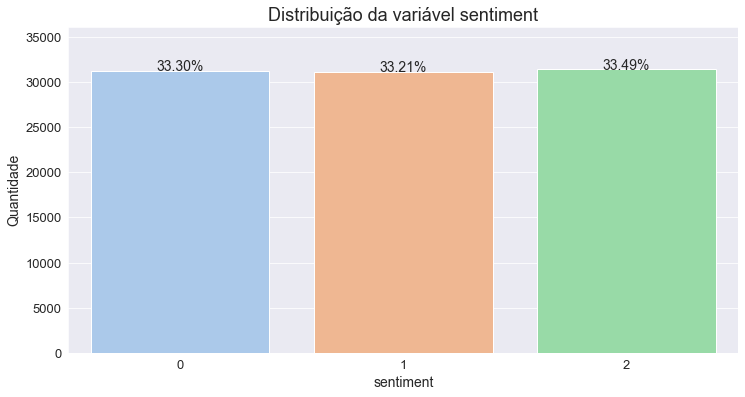

In [52]:
# Distribuição da variavel sentiment

col = 'sentiment'

total = len(dfc)

plt.figure(figsize=(12,6))
g = sns.countplot(x=col, data=dfc, palette=colors)
g.set_title(f"Distribuição da variável {col}")
g.set_xlabel(f"{col}")
g.set_ylabel("Quantidade")
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.15)
plt.show()


---

**Conclusões:** 

Analisando a variável **sentiment** podemos constatar que o nosso dataframe contém quantidades de tweets balanceados, diminuindo a tendência do modelo para algum dos resultados.


### Analisando as palavras dos textos

In [53]:
# Palavras mais utilizadas nos textos

dfc['list_words'] = dfc['join_f_words'].apply(lambda w:str(w).split())

top = Counter([item for sublist in dfc['list_words'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Palavras','Quantidade']
temp.style.background_gradient(cmap=cmap_colors)


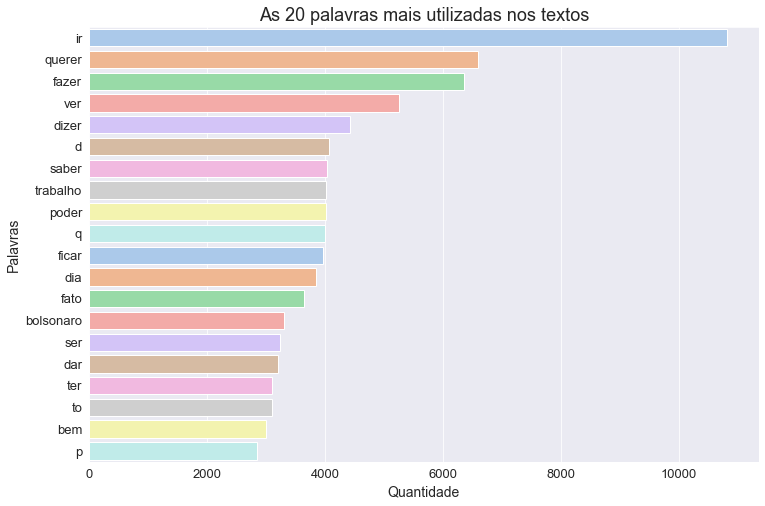

In [54]:
# Analisando a quantidade de palavras mais utilizadas

plt.figure(figsize=(12,8))

g = sns.barplot(x='Quantidade', y='Palavras', data=temp, palette=colors)
g.set_title(f"As 20 palavras mais utilizadas nos textos")
g.set_xlabel(f"Quantidade")
g.set_ylabel("Palavras")
plt.show()


In [55]:
# Analisando a quantidade de palavras mais utilizadas

fig = px.treemap(temp, path=['Palavras'], values='Quantidade',title='As 20 palavras mais utilizadas nos textos')
fig.show()


### Palavras mais utilizadas por Sentimento

In [56]:
# Criando dataframes por sentimentos

# negativo
Negative_sent = dfc[dfc['sentiment']==0]
Negative_sent.reset_index(drop=True, inplace=True)

# positivo
Positive_sent = dfc[dfc['sentiment']==1]
Positive_sent.reset_index(drop=True, inplace=True)

# neutro
Neutral_sent = dfc[dfc['sentiment']==2]
Neutral_sent.reset_index(drop=True, inplace=True)


In [57]:
# Lista auxiliar com todas as palavras do dataframe

raw_text = [word for word_list in dfc['list_words'] for word in word_list]


#### Sentimentos Negativos

In [58]:
# Palavras mais utilizadas em sentimentos negativos

top = Counter([item for sublist in Negative_sent['list_words'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Palavras','Quantidade']
temp_negative.style.background_gradient(cmap='Reds')


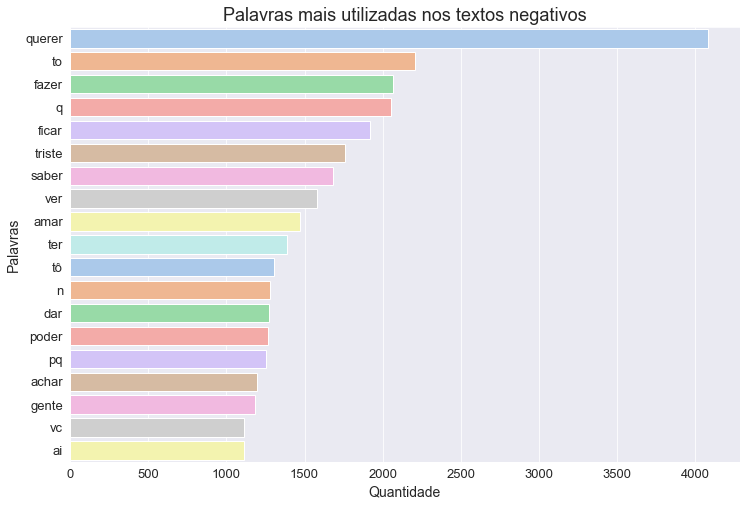

In [59]:
# Apresentação da quantidade de palavras mais utilizadas em sentimentos negativos

plt.figure(figsize=(12,8))

g = sns.barplot(x='Quantidade', y='Palavras', data=temp_negative, palette=colors)
g.set_title(f"Palavras mais utilizadas nos textos negativos")
g.set_xlabel(f"Quantidade")
g.set_ylabel("Palavras")
plt.show()


In [60]:
%%time

# O processamento desta célula leva em média 10 minutos, em uma máquina i7 com 12 cores e 32 ram 

# As 20 palavras utilizadas apenas para o sentimento negativo

Unique_Negative= words_unique(0, 20, raw_text)

print('As 20 palavras mais utilizadas apenas em Tweets negativos:')
Unique_Negative.style.background_gradient(cmap='Reds')


As 20 palavras mais utilizadas apenas em Tweets negativos:
Wall time: 9min 22s


In [61]:
# As 20 palavras utilizadas apenas para o sentimento negativos

fig = px.treemap(Unique_Negative, path=['words'], values='count',title='As 20 palavras mais utilizadas apenas em Tweets negativos')
fig.show()


#### Sentimentos Positivos

In [62]:
# Palavras mais utilizadas em sentimentos positivos

top = Counter([item for sublist in Positive_sent['list_words'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Palavras','Quantidade']
temp_positive.style.background_gradient(cmap=cmap_colors)


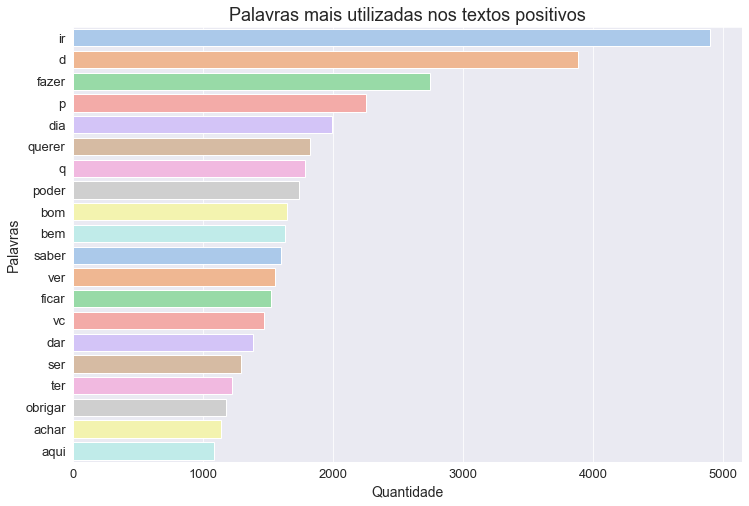

In [63]:
# Apresentação da quantidade de palavras mais utilizadas em sentimentos positivos

plt.figure(figsize=(12,8))

g = sns.barplot(x='Quantidade', y='Palavras', data=temp_positive, palette=colors)
g.set_title(f"Palavras mais utilizadas nos textos positivos")
g.set_xlabel(f"Quantidade")
g.set_ylabel("Palavras")
plt.show()


In [64]:
%%time

# O processamento desta célula leva em média 10 minutos, em uma máquina i7 com 12 cores e 32 ram 

# As 20 palavras utilizadas apenas para o sentimento positivo

Unique_Positive = words_unique(1, 20, raw_text)

print('As 20 palavras mais utilizadas apenas em Tweets positivos:')
Unique_Positive.style.background_gradient(cmap=cmap_colors)


As 20 palavras mais utilizadas apenas em Tweets positivos:
Wall time: 7min 53s


In [65]:
# Apresentação das palavras utilizadas em sentimentos positivos

fig = px.treemap(Unique_Positive, path=['words'], values='count',title='As 20 palavras mais utilizadas apenas em Tweets positivos')
fig.show()


#### Sentimentos Neutros

In [66]:
# Palavras mais utilizadas em sentimentos neutros

top = Counter([item for sublist in Neutral_sent['list_words'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Palavras','Quantidade']
temp_neutral.style.background_gradient(cmap=cmap_colors)


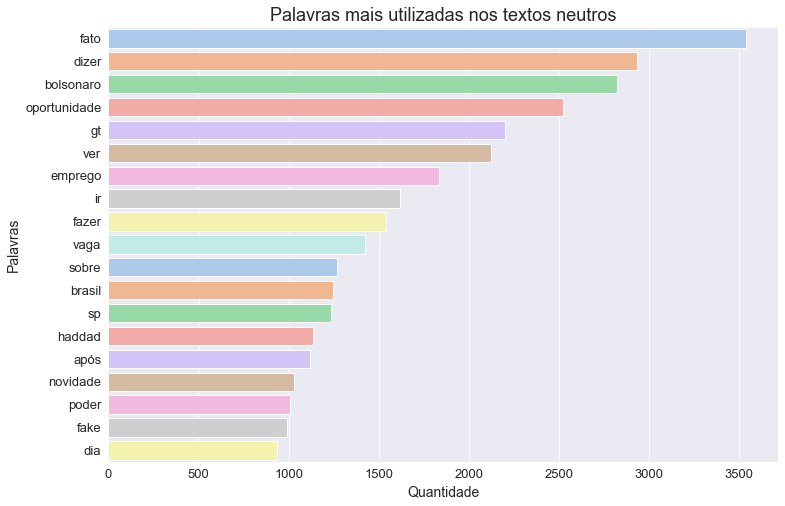

In [67]:
# Apresentação da quantidade de palavras mais utilizadas em sentimentos neutros

plt.figure(figsize=(12,8))

g = sns.barplot(x='Quantidade', y='Palavras', data=temp_neutral, palette=colors)
g.set_title(f"Palavras mais utilizadas nos textos neutros")
g.set_xlabel(f"Quantidade")
g.set_ylabel("Palavras")
plt.show()


In [68]:
%%time

# O processamento desta célula leva em média 10 minutos, em uma máquina i7 com 12 cores e 32 ram 

# As 20 palavras utilizadas apenas para o sentimento neutro

Unique_Neutral= words_unique(2, 20, raw_text)

print('As 20 palavras utilizadas apenas em Tweets neutros:')
Unique_Neutral.style.background_gradient(cmap=cmap_colors)


As 20 palavras utilizadas apenas em Tweets neutros:
Wall time: 6min 39s


In [69]:
# Apresentação das palavras utilizadas em sentimentos neutros

fig = px.treemap(Unique_Neutral, path=['words'], values='count',title='As 20 palavras mais utilizadas apenas em Tweets neutros')
fig.show()


#### WordClouds

**Sentimentos negativos**

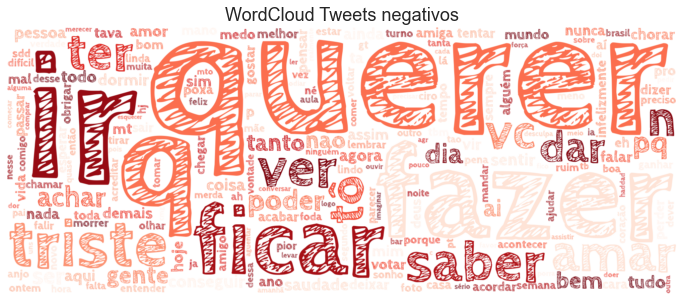

In [70]:
# WordCloud para Tweets negativos

text = ' '.join(Negative_sent['join_f_words'])
plot_wordcloud(text, title = 'WordCloud Tweets negativos', backcolor = 'white', clrmap = 'Reds')


**Sentimentos positivos**

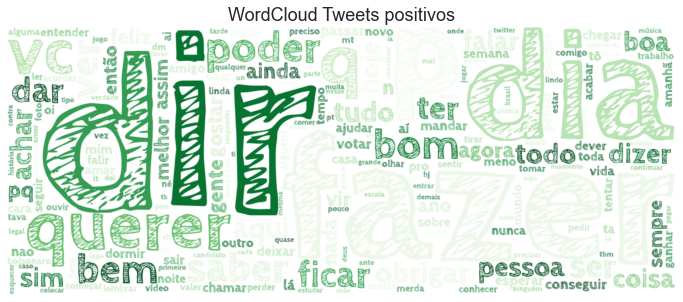

In [71]:
# WordCloud para Tweets positivos

text = ' '.join(Positive_sent['join_f_words'])
plot_wordcloud(text, title = 'WordCloud Tweets positivos', backcolor = 'white', clrmap = 'Greens')


**Sentimentos neutros**

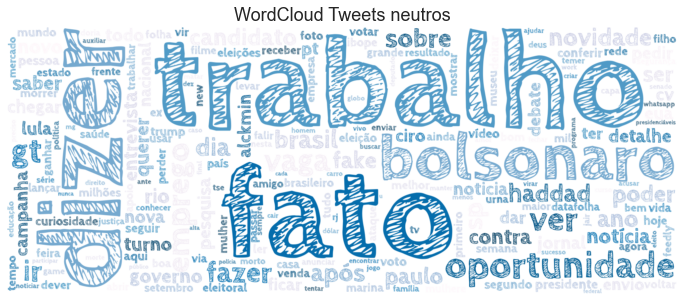

In [72]:
# WordCloud para Tweets neutros

text = ' '.join(Neutral_sent['join_f_words'])
plot_wordcloud(text, title = 'WordCloud Tweets neutros', backcolor = 'white', clrmap = 'PuBu')


---

**Conclusões:** 

- Podemos ver que as mesmas palavras são comuns nos três segmentos;


- Isso é interessante porque algumas palavras são mais de natureza negativa e outras palavras são mais de natureza positiva, o que significa que os nossos dados podem estar incorretamente etiquetados;


- Olhando para as palavras únicas de cada sentimento, temos mais clareza sobre os dados, estas palavras únicas são determinantes para o sentimento dos tweets;


## 4. Treinamento do modelo

### Separando conjunto de dados Treino e Teste

In [73]:
# A nossa base de dados tem 93.793 mil linhas e a quantidade de palavras disponíveis nos textos é muito grande. 
# Para evitar problemas de alocação de memória, processamento dos textos e modelagem, iremos criar uma amostra com 50% da base:

# Caso o notebook apresente problemas de alocação de memória, favor diminuir o percentual da amostra dos dados.

dfm = dfc.sample(frac=0.5, replace=False)


In [74]:
# Vamos dividir os nossos dados numa matriz X que contém as características a treinar, 
# e uma matriz y com a variável alvo, neste caso a coluna covid_res. 

X = dfm['join_f_words']
y = dfm['sentiment']


In [75]:
# Vamos dividir os dados num conjunto de Train e num conjunto de Test. 
# Iremos treinar o modelo no conjunto de treino e depois utilizaremos o conjunto de testes para avaliar o modelo

random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)


In [76]:
# Quantidade total da variável "target" (sentiment)

y.value_counts().sort_index()


0    15552
1    15626
2    15718
Name: sentiment, dtype: int64

In [77]:
# Quantidade separada para o conjunto de treino inicial

y_train.value_counts().sort_index()


0    10935
1    10904
2    10988
Name: sentiment, dtype: int64

In [78]:
# Quantidade separada para o conjunto de teste inicial

y_test.value_counts().sort_index()#(normalize = True)


0    4617
1    4722
2    4730
Name: sentiment, dtype: int64

### Processando modelos

In [79]:
# Lista de modelos para testes

list_models = [
    {'model_name': 'Dummy Classifier uniform',
     'estimator' : DummyClassifier(strategy='uniform', random_state=random_seed)},
    {'model_name': 'Naive Bayes Gaussian',
     'estimator' : GaussianNB()},
    {'model_name': 'Multinomial Naive Bayes',
     'estimator' : MultinomialNB()},
    {'model_name': 'Bernoulli Naive Bayes',
     'estimator' : BernoulliNB()},
    {'model_name': 'Linear Support Vector Machine',
     'estimator' : LinearSVC(random_state=random_seed)},
    {'model_name': 'Logistic Regression',
     'estimator' : LogisticRegression(n_jobs=-1, random_state=random_seed)},
    {'model_name': 'Stochastic Gradient Descent Classifier',
     'estimator' : SGDClassifier(n_jobs=-1, loss='modified_huber',random_state=random_seed)},
    {'model_name': 'LightGBM',
     'estimator' : LGBMClassifier(random_state=random_seed)}    
]

# Os modelos abaixo foram retirados por apresentarem tempo de processamento superior 20 minutos com sample de 50% 
# e apresentarem resultados muito similares com os modelos escolhidos

#{'model_name': 'Decision Tree',
# 'estimator' : DecisionTreeClassifier(random_state=random_seed)},
#{'model_name': 'Random Forest',
# 'estimator' : RandomForestClassifier(random_state=random_seed)}, 
#{'model_name': 'AdaBoost',
# 'estimator' : AdaBoostClassifier(random_state=random_seed)},
#{'model_name': 'GradientBoosting',
# 'estimator' : GradientBoostingClassifier(random_state=random_seed)},
#{'model_name': 'XGBoost',
# 'estimator' : XGBClassifier(random_state=random_seed)}
#{'model_name': 'Support Vector Machine',
# 'estimator' : SVC(random_state=random_seed)},
#{'model_name': 'KNN (k-nearest neighbor)',
# 'estimator' : KNeighborsClassifier(n_neighbors=3)},


#### Técnica Bag of Words

##### CountVectorizer

In [80]:
# Instanciando CountVectorizer

cv = CountVectorizer()


In [81]:
# Treinando o modelo com os conjuntos de dados de treinamento 

X_train_cv = cv.fit_transform(X_train).toarray()
X_test_cv = cv.transform(X_test).toarray()


**Processando modelos**


Model      : Dummy Classifier uniform
Accuracy   : 0.3368 
Precision  : 0.3368 
Recall     : 0.3368 
F1 - Score : 0.3367 
MAE        : 0.8860 
RMSE       : 1.1539 
R2         : -1.0044 

              precision    recall  f1-score   support

           0       0.34      0.35      0.34      4617
           1       0.34      0.34      0.34      4722
           2       0.33      0.32      0.33      4730

    accuracy                           0.34     14069
   macro avg       0.34      0.34      0.34     14069
weighted avg       0.34      0.34      0.34     14069



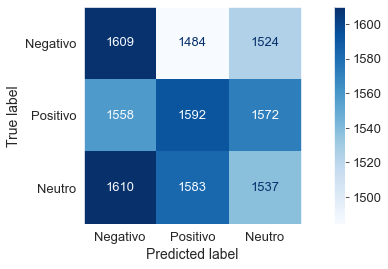

Partial time: 0:00:00.175000

Model      : Naive Bayes Gaussian
Accuracy   : 0.5822 
Precision  : 0.6061 
Recall     : 0.5822 
F1 - Score : 0.5662 
MAE        : 0.4830 
RMSE       : 0.7833 
R2         : 0.0764 

              precision    recall  f1-score   support

           0       0.50      0.85      0.63      4617
           1       0.46      0.27      0.34      4722
           2       0.85      0.63      0.73      4730

    accuracy                           0.58     14069
   macro avg       0.61      0.58      0.57     14069
weighted avg       0.61      0.58      0.57     14069



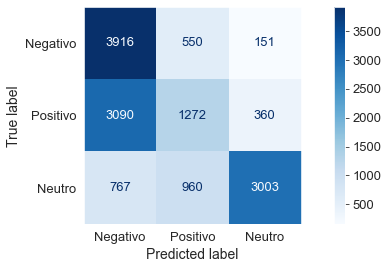

Partial time: 0:00:25.317906

Model      : Multinomial Naive Bayes
Accuracy   : 0.7684 
Precision  : 0.7655 
Recall     : 0.7684 
F1 - Score : 0.7663 
MAE        : 0.2498 
RMSE       : 0.5351 
R2         : 0.5689 

              precision    recall  f1-score   support

           0       0.71      0.74      0.73      4617
           1       0.70      0.64      0.67      4722
           2       0.88      0.92      0.90      4730

    accuracy                           0.77     14069
   macro avg       0.77      0.77      0.77     14069
weighted avg       0.77      0.77      0.77     14069



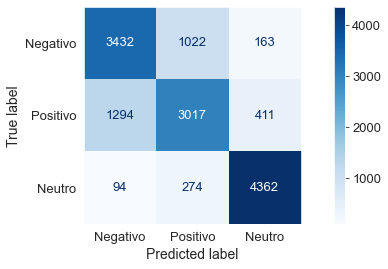

Partial time: 0:00:50.841481

Model      : Bernoulli Naive Bayes
Accuracy   : 0.7554 
Precision  : 0.7664 
Recall     : 0.7554 
F1 - Score : 0.7529 
MAE        : 0.2588 
RMSE       : 0.5359 
R2         : 0.5676 

              precision    recall  f1-score   support

           0       0.64      0.83      0.73      4617
           1       0.70      0.54      0.61      4722
           2       0.95      0.89      0.92      4730

    accuracy                           0.76     14069
   macro avg       0.77      0.76      0.75     14069
weighted avg       0.77      0.76      0.75     14069



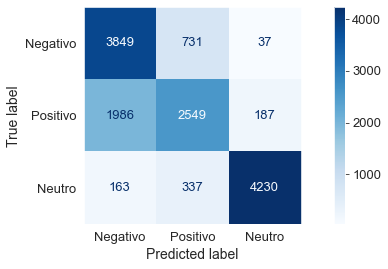

Partial time: 0:01:03.915535

Model      : Linear Support Vector Machine
Accuracy   : 0.7671 
Precision  : 0.7691 
Recall     : 0.7671 
F1 - Score : 0.7676 
MAE        : 0.2472 
RMSE       : 0.5252 
R2         : 0.5849 

              precision    recall  f1-score   support

           0       0.68      0.73      0.71      4617
           1       0.68      0.65      0.67      4722
           2       0.94      0.92      0.93      4730

    accuracy                           0.77     14069
   macro avg       0.77      0.77      0.77     14069
weighted avg       0.77      0.77      0.77     14069



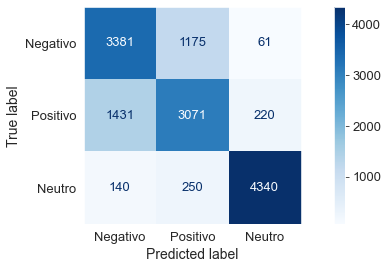

Partial time: 0:00:09.313874


PicklingError: Could not pickle the task to send it to the workers.

In [82]:
%%time

# O processamento desta célula com o processamento dos modelos leva em média 16 minutos, em uma máquina i7 com 12 cores e 32 ram 

# Processando os modelos baseado na list_models
score = []

test_models (list_models,
             "model_name",
             "estimator",
             "CountVectorizer",
             X_train_cv,
             X_test_cv,
             y_train,
             y_test)


In [83]:
# Exclusão de objetos para liberar a memória utilizada

del dfm, X, y, X_train_cv, X_test_cv

#del dfm, X, y, X_train, X_test, y_train, y_test, X_train_cv, X_test_cv
#del tfidf, X_train_tfidf, X_test_tfidf

##### TF-IDF

In [84]:
#Instanciando TF-IDF

tfidf = TfidfVectorizer(use_idf = True)


In [85]:
# Treinando o modelo com os conjuntos de dados de treinamento 

X_train_tfidf = tfidf.fit_transform(X_train).todense()
X_test_tfidf  = tfidf.transform(X_test).todense()


MemoryError: Unable to allocate 7.24 GiB for an array with shape (32827, 29610) and data type float64

**Processando modelos**

In [ ]:
%%time

# O processamento desta célula com o processamento dos modelos leva em média 10 minutos, em uma máquina i7 com 12 cores e 32 ram 

# Processando os modelos baseado na list_models

test_models (list_models,
             "model_name",
             "estimator",
             "TF-IDF",
             X_train_tfidf,
             X_test_tfidf,
             y_train,
             y_test)


In [ ]:
# Exclusão de objetos para liberar a memória utilizada

del tfidf, X_train_tfidf, X_test_tfidf


#### Técnica Word2Vec

In [ ]:
#Instanciando Word2Vec

#w2v = Word2Vec(sentences=X_train, vector_size=500, min_count=5, workers=2)
w2v = Word2Vec(sentences=X_train, vector_size=500, min_count=5, workers=2)


In [ ]:
# Preparando a classe de treinamento

X_train_w2v_m = []
X_train_w2v_s = []
X_train_w2v_sn = []

for phrase in X_train:
    vecs = []
    for word in phrase:
        if word in w2v.wv.index_to_key:
            vecs.append(w2v.wv.get_vector(word))
            
    if vecs:
        soma = np.sum(vecs, axis=0)
        media = soma/len(vecs)
        soma_normalizada = soma / np.linalg.norm(soma)
        
        X_train_w2v_m.append(media)
        X_train_w2v_s.append(soma)
        X_train_w2v_sn.append(soma_normalizada)
        
    else:
        X_train_w2v_m.append(np.zeros(w2v.vector_size))
        X_train_w2v_s.append(np.zeros(w2v.vector_size))
        X_train_w2v_sn.append(np.zeros(w2v.vector_size))
    
    
X_train_w2v_m = np.array(X_train_w2v_m)
X_train_w2v_s = np.array(X_train_w2v_s)
X_train_w2v_sn = np.array(X_train_w2v_sn)

In [ ]:
# Preparando a classe de teste

X_test_w2v_m = []
X_test_w2v_s = []
X_test_w2v_sn = []

for phrase in X_test:
    vecs = []
    for word in phrase:
        if word in w2v.wv.index_to_key:
            vecs.append(w2v.wv.get_vector(word))
            
    if vecs:
        soma = np.sum(vecs, axis=0)
        media = soma/len(vecs)
        soma_normalizada = soma / np.linalg.norm(soma)
        
        X_test_w2v_m.append(media)
        X_test_w2v_s.append(soma)
        X_test_w2v_sn.append(soma_normalizada)
        
    else:
        X_test_w2v_m.append(np.zeros(w2v.vector_size))
        X_test_w2v_s.append(np.zeros(w2v.vector_size))
        X_test_w2v_sn.append(np.zeros(w2v.vector_size))
    
    
X_test_w2v_m = np.array(X_test_w2v_m)
X_test_w2v_s = np.array(X_test_w2v_s)
X_test_w2v_sn = np.array(X_test_w2v_sn)

**Processando modelos**

In [ ]:
%%time

# O processamento desta célula com o processamento dos modelos leva em média 10 minutos, em uma máquina i7 com 12 cores e 32 ram 

# Processando os modelos baseado na list_models

test_models (list_models,
             "model_name",
             "estimator",
             "Word2Vec",
             X_train_w2v_m,
             X_test_w2v_m,
             y_train,
             y_test)


#### Técnica Doc2Vec

In [ ]:
# Instanciando Doc2Vec

d2v = doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=20)


In [ ]:
# Preparando a classe de treinamento e teste

train_corpus = read_corpus(X_train)
test_corpus = read_corpus(X_test, tokens_only=True)

d2v.build_vocab(train_corpus)

d2v.train(train_corpus, total_examples=d2v.corpus_count, epochs=d2v.epochs)

X_train_d2v = np.array(list(map(d2v.infer_vector, X_train)))
X_test_d2v = np.array(list(map(d2v.infer_vector, X_test)))


In [ ]:
test_corpus

**Processando modelos**

In [ ]:
# O processamento desta célula com o processamento dos modelos leva em média 10 minutos, em uma máquina i7 com 12 cores e 32 ram 

# Processando os modelos baseado na list_models

%%time

# O processamento desta célula com o processamento dos modelos leva em média 10 minutos, em uma máquina i7 com 12 cores e 32 ram 

# Processando os modelos baseado na list_models

test_models (list_models,
             "model_name",
             "estimator",
             "Doc2Vec",
             X_train_w2v_m,
             X_test_w2v_m,
             y_train,
             y_test)


#### Análise

In [ ]:
# Conmparação das pontuações após técnicas de balanceamento
# Ordenando a pontuação
score.sort(key = lambda y:y[2],reverse =True)

# Exibindo a pontuação
print("Comparação da Acurácia dos modelos: ")
pd.DataFrame (score, columns = ['Model', 'Tool', 'Accuracy'])


## 5. Conclusões